In [ ]:
#TEMAS VISTOS
1. PANDAS 
2. BIAS Y VARIANZA ; IRREDUCIBLES 
3. REGRESION LINEAL 
4. RL SIMPLE (ax+b)
5. RL MULTIPLE VARIABLE 
6. RL POLINOMICA (P(X))
7. CORRELACION DE PEARSON Y MAPAS DE CALOR
8. Correlacion y RL
9. Vectores de soporte en RL 

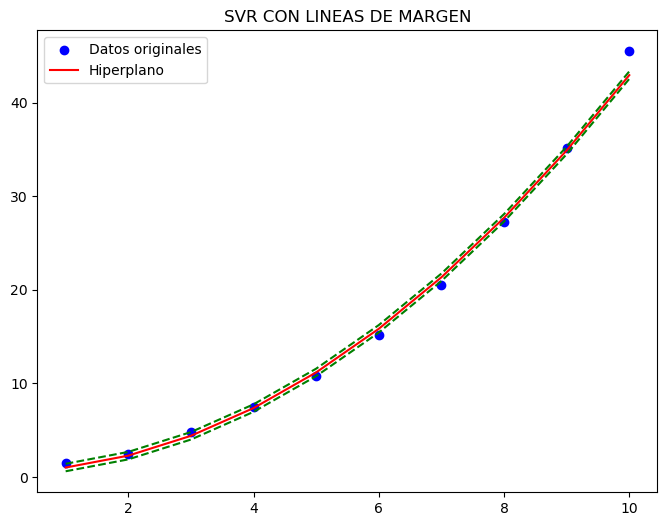

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Datos fijos
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Convertir a matriz columna
y = np.array([1.5, 2.5, 4.8, 7.5, 10.8, 15.2, 20.5, 27.3, 35.2, 45.5])  # Valores de salida

# Creamos el modelo SVR , kernel polinomico
svr_model = SVR(kernel = 'poly' , degree =2 , C = 10 ,epsilon = 0.4)

#ajustamos el modelo
svr_model.fit(X,y)

#predicciones 
y_pred = svr_model.predict(X) # hiperplano

#Calcular las lineas de margen
epsilon = svr_model.epsilon
y_margen_sup = y_pred + epsilon
y_margen_inf = y_pred - epsilon

#Obtener los indices de los vectores de soporte
indices_soporte = svr_model.support_

#obtener los valores de los vectores de soporte
X_soporte = X[indices_soporte]
y_soporte = y[indices_soporte]


#Grafica 
plt.figure(figsize =(8,6))
plt.scatter(X,y , color = 'blue' , label = 'Datos originales')

#graficar el hiperplano o curva de predicción SVR 
plt.plot(X , y_pred , color = 'red' , label = 'Hiperplano')

#Graficar los margenes
plt.plot(X , y_margen_sup  , color = 'green' , linestyle ='--') # margen superior
plt.plot(X , y_margen_inf  , color = 'green' , linestyle ='--') # margen inferior
plt.title('SVR CON LINEAS DE MARGEN')
plt.legend()

plt.show()

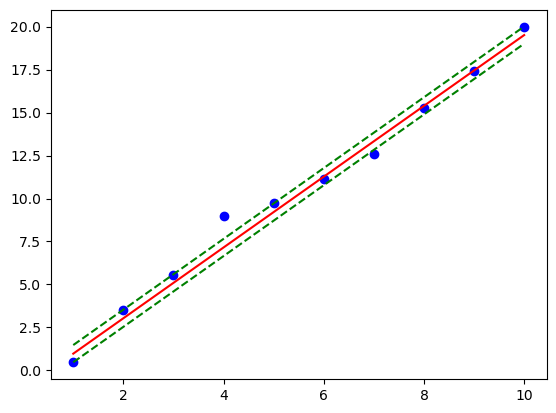

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Datos lineales con ruido
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = 2 * X.ravel() + np.random.normal(0, 1, size=X.shape[0])

#kernel lineal
svr_model = SVR(kernel = 'linear' , C=10 ,epsilon = 0.5)
#AJUSTAR
svr_model.fit(X,y)
y_pred = svr_model.predict(X)

#Creamos los margenes
epsilon = svr_model.epsilon
y_margen_sup = y_pred + epsilon
y_margen_inf = y_pred - epsilon



# GRAFICA
plt.scatter( X,y , color = 'blue')
plt.plot(X,y_pred , color = 'red')#hiperplano lineal
#Graficar los margenes
plt.plot(X , y_margen_sup  , color = 'green' , linestyle ='--') # margen superior
plt.plot(X , y_margen_inf  , color = 'green' , linestyle ='--') # margen inferior
plt.show()

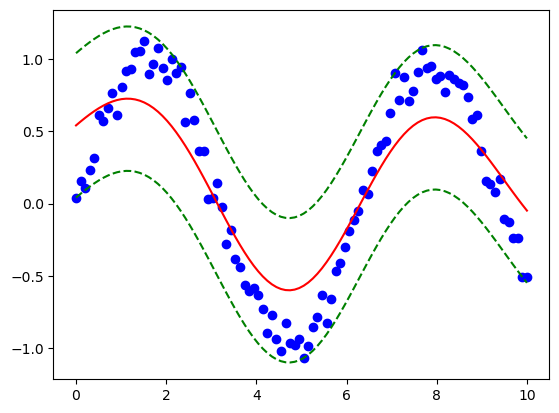

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Datos sinusoidales con ruido
X = np.linspace(0, 10, 100).reshape(-1, 1) # np.linspace(desde , hasta , cuantas lineas)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0]) # funciones resultado de una sumatoria

# Crear un modelo kernel RBF
svr_model = SVR(kernel = 'rbf' , C=10 , epsilon = 0.5 , gamma =0.1) # gamma influye en la forma del modelo o kernel
#ajustar el modelo
svr_model.fit(X,y)
#predicciones
y_pred = svr_model.predict(X) # HIPERPLANO RBF

#Creamos los margenes
epsilon = svr_model.epsilon
y_margen_sup = y_pred + epsilon
y_margen_inf = y_pred - epsilon

#GRAFICAR 
plt.scatter(X,y ,color = 'blue')
plt.plot(X,y_pred , color = 'red')#hiperplano lineal
#Graficar los margenes
plt.plot(X , y_margen_sup  , color = 'green' , linestyle ='--') # margen superior
plt.plot(X , y_margen_inf  , color = 'green' , linestyle ='--') # margen inferior
plt.show()



In [ ]:
# hagan el mismo ejemplo con coseno 200lineas

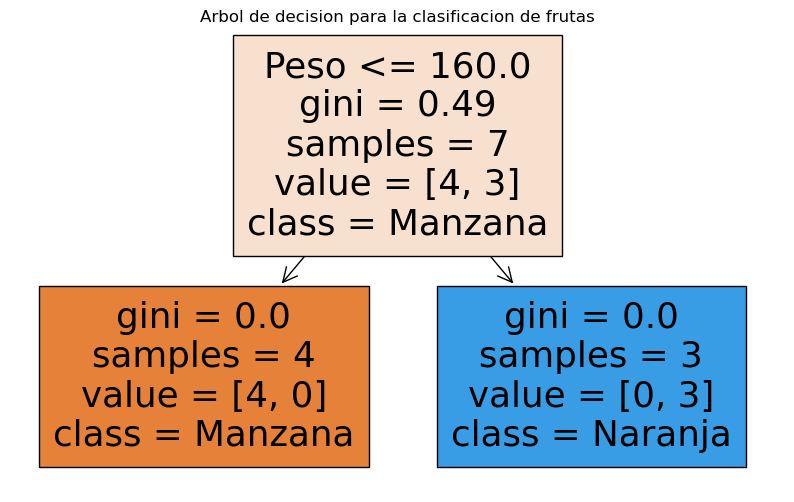

['Naranja']


In [29]:
#arboles de decision

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Crear dataset
data = {
    "Peso": [150, 180, 140, 130, 170, 200, 110],
    "Color_Rojo": [1, 0, 1, 1, 0, 0, 1],  # 1=Rojo, 0=Naranja
    "Fruta": ["Manzana", "Naranja", "Manzana", "Manzana", "Naranja", "Naranja", "Manzana"],
}
df = pd.DataFrame(data)

#Variables independientes y dependientes
X = df[["Peso" ,"Color_Rojo"]]
y = df["Fruta"]

#Creamos y entrenamos nuestro arbol de decision
modelo = DecisionTreeClassifier(random_state = 42) # estudiar el random state
modelo.fit(X,y)

#Visualizar el arbol 
plt.figure(figsize=(10,6))
plot_tree(modelo , feature_names = ["Peso" ,"Color_Rojo"] , class_names = ["Manzana", "Naranja"],filled = True)
plt.title('Arbol de decision para la clasificacion de frutas')
plt.show()

#Introducimos datos al arbol 
nuevo_dato = pd.DataFrame({
    "Peso" : [180],
    "Color_Rojo" : [1]
})
prediccion = modelo.predict(nuevo_dato)
print(prediccion)

In [ ]:
data = {
    "Ingreso": [40000, 50000, 60000, 70000, 80000],
    "Deuda": [10000, 15000, 20000, 25000, 30000],
    "Aprobado": [1, 1, 0, 0, 0],  # 1=Sí, 0=No
}

df = pd.DataFrame(data)

# Variables independientes y dependiente
X = df[["Ingreso", "Deuda"]]
y = df["Aprobado"]

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Leer el archivo Excel
df = pd.read_excel('estudiantes.xlsx')

# Variables independientes y dependiente
X = df[["Horas_Estudio", "Asistencias"]]
y = df["Aprobado"]

# creamos y entrenamos el arbol de decision
modelo = DecisionTreeClassifier(max_depth = 3 ,random_state = 42) # a mayor max_depth el 
#modelo se ajusta mas a los datos pero nos puede llevar a un sobreajuste 
modelo.fit(X ,y)

#visualizar el arbol 
plt.figure(figsize(12,8))
plot_tree(modelo , feature_names = ["Horas_Estudio", "Asistencias"] , class_names = ["Manzana", "Naranja"],filled = True)


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = {
    "Clase": [1, 1, 3, 3, 2, 1, 3],  # 1=Primera, 2=Segunda, 3=Tercera
    "Genero_F": [1, 0, 1, 0, 1, 1, 0],  # 1=Femenino, 0=Masculino
    "Sobrevivio": [1, 0, 0, 0, 1, 1, 0],  # 1=Sí, 0=No
}

df = pd.DataFrame(data)

# Variables independientes y dependiente
X = df[["Clase", "Genero_F"]]
y = df["Sobrevivio"]



In [5]:
# Generar ejemplo de estudiantes
data_estudiantes = {
    "Horas_Estudio": [1, 2, 3, 4, 5],
    "Asistencias": [10, 20, 15, 25, 30],
    "Aprobado": [0, 0, 1, 1, 1]
}
df_estudiantes = pd.DataFrame(data_estudiantes)
df_estudiantes.to_excel("estudiantes.xlsx", index=False)

# Generar ejemplo de compras
data_compras = {
    "Edad": [18, 22, 30, 40, 50],
    "Ingresos": [1500, 2500, 3000, 5000, 7000],
    "Compra": [0, 1, 1, 1, 0]
}
df_compras = pd.DataFrame(data_compras)
df_compras.to_excel("compras.xlsx", index=False)

# Generar ejemplo de churn
data_churn = {
    "Meses_Activos": [1, 12, 24, 36, 48],
    "Gastos": [500, 1200, 2400, 3600, 4800],
    "Churn": [1, 0, 0, 0, 1]
}
df_churn = pd.DataFrame(data_churn)
df_churn.to_excel("churn_clientes.xlsx", index=False)

In [ ]:
import pandas as pd

# Crear datos fijos
data = {
    "Edad": [25, 30, 35, 40, 45, 50, 55, 60, 25, 30, 35, 40, 45, 50, 55, 60, 25, 30, 35, 40],
    "IngresoMensual": [3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 3000, 4000, 5000, 6000],
    "AntiguedadBanco": [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4],
    "SaldoCuenta": [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 5000, 10000, 15000, 20000],
    "DeudasPendientes": [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 0, 1000, 2000, 3000],
    "NumProductos": [1, 2, 1, 2, 3, 3, 4, 4, 1, 2, 1, 2, 3, 3, 4, 4, 1, 2, 1, 2],
    "AceptóOferta": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

# Crear un DataFrame con los datos
dataset = pd.DataFrame(data)

# Mostrar las primeras filas del dataset
print("Dataset fijo:")
print(dataset)